In [1]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')

In [5]:
x_train = pd.read_csv('x_train.csv')
x_train = x_train.set_index('Unnamed: 0')
x_train = x_train.T
x_train

Unnamed: 0     KIF1B    S100A9       PGD     WDFY3      TSPO     PADI4  \
GSM648711   0.537750  1.435819  0.994471  1.316176  1.239603  0.192664   
GSM648658  -0.018658  1.182293  0.706534  0.141485  0.947370 -0.358131   
GSM648656  -1.081810 -0.681771 -0.369643 -0.753620 -0.904368 -0.410865   
GSM648606   0.253222 -0.442855 -0.895136  0.148155 -1.174378 -0.926677   
GSM648652   0.712567  1.226982  2.457591  1.073347  1.715177  0.892852   
...              ...       ...       ...       ...       ...       ...   
GSM648713   0.787128  0.435464  0.072954  0.371399  0.175673  0.818479   
GSM648657   0.482761  0.903843  1.505904  0.683486  1.590728  0.476030   
GSM648654   2.010984  0.509373  0.457554  0.586695  0.275677  2.780533   
GSM648707  -0.731509 -0.167843 -0.985647 -0.851688 -0.545465 -0.946890   
GSM648637  -1.069294 -1.328049 -1.145580 -1.032213 -1.209380 -0.916312   

Unnamed: 0     SORT1      CD63      MMP9      VNN1  ...      CAMP      LY96  \
GSM648711   0.094810  1.433241  0.096927  0.294543  ... -0.541197  0.990718   
GSM648658   0.101984  1.492519  0.210410  0.035771  ...  0.533565  0.843415   
GSM648656  -0.633157 -1.073827 -0.849083 -0.232861  ... -0.716100 -1.199380   
GSM648606  -0.514131 -1.112439 -0.753226 -0.633487  ... -0.485942  0.424402   
GSM648652   0.720490  2.767263  2.650286  0.727882  ... -0.402022 -0.141481   
...              ...       ...       ...       ...  ...       ...       ...   
GSM648713  -0.199565 -0.027493  0.505585 -0.027380  ...  1.755812  0.306474   
GSM648657  -0.107772  2.404526  0.637177  0.016807  ...  1.160060  0.885748   
GSM648654   0.883220  0.917144 -0.131849  1.977171  ... -0.104562  0.127206   
GSM648707  -0.764669 -0.120488 -0.696123 -0.618410  ... -0.714438 -0.217940   
GSM648637  -0.900432 -1.294623 -0.889828 -0.899133  ... -0.418224 -0.965251   

Unnamed: 0      AIM2      CD14    AKR1C3       MPO     ELANE      FHIT  \
GSM648711  -0.154734  2.636598 -0.643076  0.001015  0.077553  0.158468   
GSM648658   1.267506  2.094991 -0.549054 -0.088248  0.065518 -0.515198   
GSM648656  -0.707700 -0.865339 -0.699489 -0.224511 -0.229681 -0.332482   
GSM648606   0.826780 -1.005042 -0.528803 -0.292085 -0.259625 -0.067147   
GSM648652   0.266902  2.639725 -0.575091  0.958794  0.708302 -0.710624   
...              ...       ...       ...       ...       ...       ...   
GSM648713  -0.368021 -0.175169 -0.700936  0.158012  0.494512 -0.411924   
GSM648657   0.257357  2.081959 -0.729865  0.519204  0.694851 -0.666137   
GSM648654  -0.646479 -0.429552 -0.280007  1.053510  0.625476 -0.232385   
GSM648707  -0.502312 -0.298712  1.344401 -0.287946 -0.268864  4.348224   
GSM648637  -0.713295 -1.086882  0.353555 -0.247832 -0.240936 -0.005182   

Unnamed: 0     THBS1     DDIT4  
GSM648711   0.095692  0.247875  
GSM648658  -0.463108 -0.824410  
GSM648656   1.637353 -0.458832  
GSM648606  -0.338377 -0.525195  
GSM648652  -0.221784 -0.534509  
...              ...       ...  
GSM648713  -0.191058  0.849798  
GSM648657  -0.294281  0.228082  
GSM648654   0.829091  1.873184  
GSM648707  -0.503011  1.306189  
GSM648637  -0.438071  0.694951  

[104 rows x 58 columns]

In [11]:
x_test = pd.read_csv('x_test.csv')
x_test = x_test.set_index('Unnamed: 0')
x_test

KIF1B    S100A9       PGD     WDFY3      TSPO     PADI4  \
Unnamed: 0                                                               
GSM648598   0.841850  1.371363  0.867345  1.249188  0.772918  1.028510   
GSM648649  -0.037963  0.646879  1.162019 -0.000580  1.411276  1.415660   
GSM648682  -0.774647 -1.117493 -1.103986 -1.042715 -1.115487 -0.344785   
GSM648694  -1.075951 -1.658063 -1.279150 -1.088556 -1.279382 -0.993793   
GSM648687  -0.941210 -1.543761 -1.146459 -0.993043 -1.223269 -0.951165   
GSM648620   0.002912  0.043572  0.035168  0.028656  0.589023 -0.020087   
GSM648634   1.592514  0.910719  2.178148  0.799720  1.627951  2.303463   
GSM648623   0.269066  0.539453 -0.432034  0.745364 -0.400460  0.277143   
GSM648653   2.331594  1.724581  1.532852  1.528066  1.917407  3.103806   
GSM648616  -0.847077 -1.072804 -1.007616 -0.994178 -1.012705 -0.949351   
GSM648663  -0.507694 -0.303630 -0.541000 -0.119369 -0.245454 -0.287387   
GSM648597   0.136055  0.808449 -0.673398 -0.024139  0.185674 -0.550022   
GSM648612   1.194947  0.600471  0.355619  0.368986  0.999594  0.332728   
GSM648695   1.519285  0.020368  0.108690  0.555330 -0.423794 -0.081373   
GSM648600   0.982583  0.624534  1.354466  0.160928  0.615135  0.505701   
GSM648638  -1.050121 -1.238670 -1.004687 -0.969342 -1.176601 -0.914368   
GSM648715  -0.231821  0.217173  0.691595  0.170579  0.400682 -0.100549   
GSM648680   1.184295  1.624890  1.364425  1.794880  2.142415  1.569458   
GSM648592   1.062469  0.802433  0.115427  0.008503  0.336791  0.167010   
GSM648683   0.550132  0.329756  0.816085  0.519566  0.078447 -0.232320   
GSM648642  -0.470547  0.004039  0.377588 -0.570540  0.101782  2.100818   
GSM648686  -1.183931 -1.341799 -1.301119 -1.220544 -0.961037 -0.926936   
GSM648614   0.079469 -0.318240 -0.667833  0.107139 -0.307123 -0.651215   
GSM648641  -0.969969 -1.022958 -0.975981 -0.782714 -0.657692 -0.569198   
GSM648640  -1.133070 -1.331487 -1.213830 -0.992617 -1.263271 -0.904521   
GSM648630  -1.001524 -1.450945 -1.301705 -1.152421 -1.221047 -1.005584   

               SORT1      CD63      MMP9      VNN1  ...      CAMP      LY96  \
Unnamed: 0                                          ...                       
GSM648598   0.553111  1.375051 -0.225412  1.531504  ...  1.297573  3.736331   
GSM648649   0.106235  1.341334  2.338209  1.063554  ... -0.183497 -0.098284   
GSM648682  -0.104716 -0.927536 -0.922907 -0.883108  ... -0.562385 -0.666327   
GSM648694  -0.860314 -1.121140 -0.885663 -0.943130  ... -0.742689 -1.134152   
GSM648687  -0.866824 -1.014005 -0.843771 -0.830528  ... -0.636750 -0.726803   
GSM648620   0.344285  0.671876 -0.690630  0.047529  ... -0.511285 -0.885336   
GSM648634   2.197812  1.026998  1.065755  0.481343  ... -0.357154  0.059818   
GSM648623  -0.753511 -0.565343  0.078215 -0.323085  ... -0.176019  1.042986   
GSM648653   1.590464  1.605636  1.949470  0.278897  ... -0.200115  0.804970   
GSM648616  -0.905879 -0.978656 -0.859586 -0.912360  ... -0.576094 -0.704772   
GSM648663  -0.584936 -0.525643  0.025095 -0.838067  ...  0.099838 -0.397208   
GSM648597  -0.783798  0.465219 -0.233862 -0.258843  ...  1.048720  1.513836   
GSM648612  -0.243535 -0.258622  1.144227 -0.674593  ... -0.109547 -0.171287   
GSM648695  -0.064466 -0.370107 -0.014141  2.132206  ... -0.095837  0.495246   
GSM648600   0.699900  0.797501  1.062737 -0.435687  ...  0.191237  0.016621   
GSM648638  -0.784994 -1.252748 -0.882162 -0.885004  ... -0.383327 -0.933285   
GSM648715   0.284507  0.348839  0.605788 -0.380642  ... -0.127411  0.018781   
GSM648680   1.277226  1.932480  0.456691  3.084226  ...  0.695174  1.927233   
GSM648592  -0.264657  0.413012  0.558101  0.133344  ...  1.912851 -0.452069   
GSM648683   1.207617  0.071485 -0.146940  0.324886  ... -0.288605 -0.188998   
GSM648642   0.204670  0.382557  0.043808 -0.181609  ...  0.166725 -0.658119   
GSM648686  -0.879444 -0.987357 -0.926831 -0.946070  ... -0.537042 -0.737602   
GSM648614  -0.378103 -0.388598 -0.520828 -0.25

In [7]:
y_train = pd.read_csv('y_train.csv')
y_train

label
0        1
1        1
2        1
3        0
4        1
..     ...
99       1
100      1
101      1
102      1
103      1

[104 rows x 1 columns]

In [8]:
y_test = pd.read_csv('y_test.csv')
y_test

label
0       0
1       1
2       1
3       1
4       1
5       0
6       1
7       1
8       1
9       0
10      1
11      0
12      0
13      1
14      0
15      1
16      1
17      1
18      0
19      1
20      1
21      1
22      0
23      1
24      1
25      1

# 在训练集上使用随机森林(RF)算法进行特征重要性排序

In [9]:
param_grid_rf = {
                 'n_estimators':np.arange(100, 1000, 100),
                 'criterion':['gini', 'entropy'],
                }
rfc = RandomForestClassifier(random_state=12345)
GS = GridSearchCV(rfc,param_grid_rf,cv=10)
GS.fit(x_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vec

C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vec

C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vec

C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vec

C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vec

C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vec

C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\babykai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vec

{'criterion': 'entropy', 'n_estimators': 200}
0.7709090909090909


In [12]:
# 用最佳参数训练模型
rfc=RandomForestClassifier(criterion='gini',  n_estimators=200, random_state=12345)
rfc=rfc.fit(x_train,y_train)
#给随机森林打分
y_pred = rfc.predict(x_test)
print(accuracy_score(y_test, y_pred))
aaa = pd.DataFrame(rfc.feature_importances_)
aaa.to_csv('feature_weights.csv', header=None)

C:\Users\babykai\AppData\Local\Temp\ipykernel_45216\240276545.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc=rfc.fit(x_train,y_train)


0.6923076923076923


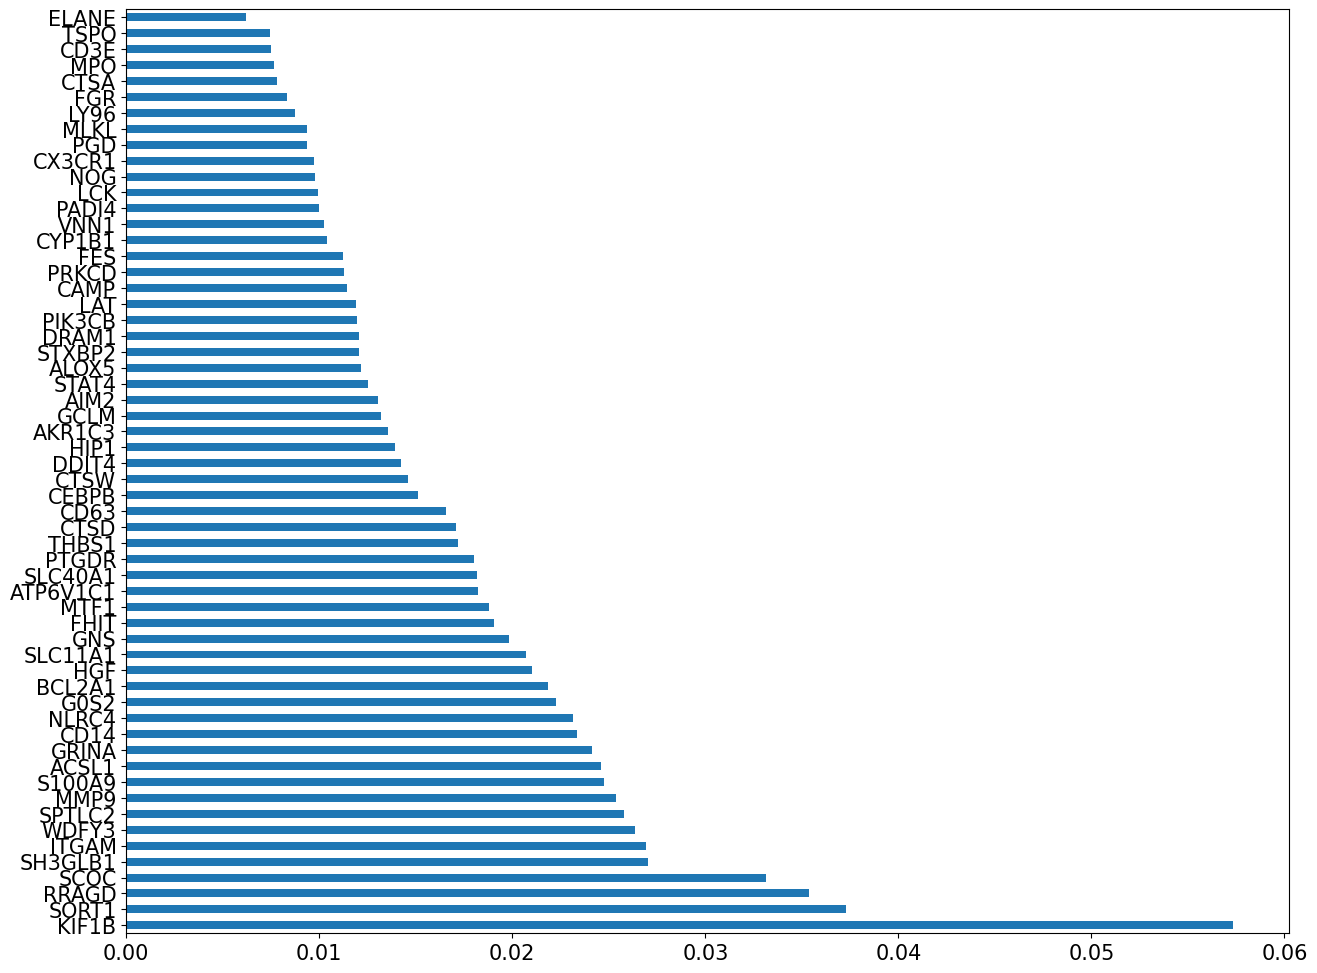

In [14]:
# 将权重与x_train的数据合并并按权重从大到小排列，保留权重最大的前50个基因，得到data_all_merge.csv。然后绘制特征重要性的柱形图并保存
c = pd.read_csv('data_all_merge_RF.csv')
c = c.set_index('ID')
plt.figure(figsize=(15, 12))
c.iloc[:,-1].plot(kind='barh')  # 横向柱状图
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('')
plt.savefig(r'feature_importance', dpi=600)
plt.show()

In [15]:
# feature_sorted.csv是经整理的，按权重值从大到小进行排序的特征列列表
feature_importance = pd.read_csv('data_all_merge_RF.csv')
# 保存权重绝对值大于所有特征权重均值(0.0204)的特征
feature_importance

ID  GSM648711  GSM648658  GSM648656  GSM648606  GSM648652  \
0      KIF1B   0.537750  -0.018658  -1.081810   0.253222   0.712567   
1      SORT1   0.094810   0.101984  -0.633157  -0.514131   0.720490   
2      RRAGD   0.826169   0.545997  -0.901664  -0.525610   1.462893   
3       SCOC   0.219547   0.057950  -0.794496  -0.403756  -0.653419   
4    SH3GLB1   0.532324   0.584763  -1.050437   0.169079   1.880185   
5      ITGAM   1.592970   1.238614  -1.167892  -0.544362   2.134239   
6      WDFY3   1.316176   0.141485  -0.753620   0.148155   1.073347   
7     SPTLC2   0.708812   0.127823  -1.098436  -0.709678   1.230582   
8       MMP9   0.096927   0.210410  -0.849083  -0.753226   2.650286   
9     S100A9   1.435819   1.182293  -0.681771  -0.442855   1.226982   
10     ACSL1   1.334521   0.771387  -0.363725  -0.234141   0.988835   
11     GRINA   0.430872   0.189071   1.379645  -0.101525   0.721468   
12      CD14   2.636598   2.094991  -0.865339  -1.005042   2.639725   
13     NLRC4   1.983074   0.357607  -0.740818  -0.714339   1.823061   
14      G0S2  -0.597412   0.162132   1.057219  -0.528469   0.771486   
15    BCL2A1   0.692328  -0.062257  -0.271206  -0.358342   0.283594   
16       HGF  -0.008111  -0.333912  -0.315008  -0.439357  -0.266428   
17   SLC11A1   3.045603   2.293273  -0.805997  -0.526728   0.296730   
18       GNS   1.562873   0.625491  -1.164452  -0.542118   1.748797   
19      FHIT   0.158468  -0.515198  -0.332482  -0.067147  -0.710624   
20      MTF1   1.446674   1.056175  -0.565785  -0.564063   1.889392   
21  ATP6V1C1   0.566105  -0.053828  -0.972357  -0.213709   0.021108   
22   SLC40A1   1.294342   1.948281  -1.338622  -0.272960   0.622334   
23     PTGDR  -0.751595  -0.554692  -0.291595   0.098022  -0.554692   
24     THBS1   0.095692  -0.463108   1.637353  -0.338377  -0.221784   
25      CTSD   0.054842   0.408076  -1.090210  -1.002369   1.710744   
26      CD63   1.433241   1.492519  -1.073827  -1.112439   2.767263   
27     CEBPB   0.682979   0.704344  -0.627058  -0.990256   1.310321   
28      CTSW  -0.651781  -0.747419  -0.766937  -0.113084  -0.027205   
29     DDIT4   0.247875  -0.824410  -0.458832  -0.525195  -0.534509   
30      HIP1   0.793845  -0.820327  -0.064785  -0.739027   2.075795   
31    AKR1C3  -0.643076  -0.549054  -0.699489  -0.528803  -0.575091   
32      GCLM   0.265703  -0.115934  -1.232105  -0.278206   1.284932   
33      AIM2  -0.154734   1.267506  -0.707700   0.826780   0.266902   
34     STAT4  -0.608232  -0.096966  -0.449226   0.172122  -0.813718   
35     ALOX5   1.213426   0.613689  -0.696816  -0.446430   1.283192   
36    STXBP2   2.201920   0.020662  -0.604666  -0.607899   0.807171   
37     DRAM1   0.097103   0.276476  -0.939125  -0.391671   0.829931   
38    PIK3CB   1.670760   0.031808  -1.283248  -0.508905   0.663229   
39       LAT   0.172637  -0.639200  -0.735113  -0.366304  -0.450799   
40      CAMP  -0.541197   0.533565  -0.716100  -0.485942  -0.402022   
41     PRKCD   1.147579   1.661939  -0.846957  -0.765053   2.688692   
42       FES   1.310467   1.303088  -1.074533  -0.766815   1.296447   
43    CYP1B1   1.446688  -0.231506  -0.816457  -0.299021   1.053401   
44      VNN1   0.294543   0.035771  -0.232861  -0.633487   0.727882   
45     PADI4   0.192664  -0.358131  -0.410865  -0.926677   0.892852   
46       LCK   0.292052  -0.742750  -0.611106  -0.088850  -0.520467   
47       NOG  -0.231705  -0.710801  -0.488706   0.059818  -0.717130   
48    CX3CR1   2.240089   1.045744  -0.750980   0.181426   0.423339   
49       PGD   0.994471   0.706534  -0.369643  -0.895136   2.457591   
50      MLKL   0.976936   0.912731  -1.005781  -0.381309   0.697185   
51      LY96   0.990718   0.843415  -1.199380   0.424402  -0.141481   
52       FGR   2.196697   1.487421  -0.742337  -1.020002   1.336989   
53      CTSA   0.533959   2.192486  -1.026199  -1.198174   3.595803   
54       MPO   0.001015  -0.088248  -0.224511  -0.292085   0.958794   
55      CD3E   0.114773  -0.897547

In [16]:
feature_list = feature_importance['ID']
feature_list = feature_list[:10]
feature_list

0      KIF1B
1      SORT1
2      RRAGD
3       SCOC
4    SH3GLB1
5      ITGAM
6      WDFY3
7     SPTLC2
8       MMP9
9     S100A9
Name: ID, dtype: object

In [17]:
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

# Logistic Regression(LR)

In [265]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('id')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [266]:
param_grid_lr = {
                 'C': np.arange(0.1, 3., 0.5),
                 }

In [196]:
# 在训练集上进行10折交叉验证，在验证集上验证AUC，保存训练集和验证集上的AUC
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i1 in range(1, len(x_train.columns)+1):
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=j)#将训练/测试数据集划分10个互斥子集
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        
        rfc = rfc.fit(x_train.iloc[:, 0:i1], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i1], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i1])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i1])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i1])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i1])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        best_para_train.append({'c':GS.best_params_['C']})
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i1] = fpr
        tpr_list[i1] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_lr_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_lr_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_lr_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_lr_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_para_lr_train.csv', index=False)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.8059895833333334
0.9236111111111112


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.928125
0.9930555555555556


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.9677083333333334
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.9848958333333333
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.9869791666666667
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.9932291666666666
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.9932291666666666
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.9932291666666666
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.9932291666666666
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0.99375
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

In [269]:
# 从上面的结果可以看出,logistic regression选择前33个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试logistic regression模型选择26个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i1 in [10]:
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=j)#将训练/测试数据集划分10个互斥子集
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i1], y_train)
        print(i1)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        rfc = rfc.fit(x_train.iloc[:, 0:i1], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i1], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i1])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i1])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i1] = fpr
        tpr_list[i1] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_lr.csv')
t1.to_csv('tpr_lr.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_lr.csv')
y_test_df.to_csv('y_test_lr.csv')  

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

6
1.0


In [273]:
# 这段代码利用上段代码的预测信息，在测试集上测试logistic regression模型选择26个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_lr.csv')
y_pred_df = pd.read_csv('y_pred_lr.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_lr.csv')
tpr_df = pd.read_csv('tpr_lr.csv')
fpr = fpr_df['6'].tolist()
tpr = tpr_df['6'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR_ROC')
plt.legend(loc="lower right")
plt.savefig(r'lr_ROC',dpi=600)
plt.show()

sensitivity: 1.0, specificity: 0.5
f1_score: 0.9


In [13]:
x_test = pd.read_csv('test.txt',sep='\t')
x_test = x_test.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test = mean_norm(x_test)
y_test = pd.read_csv('test_label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [276]:
# 从上面的结果可以看出,logistic regression选择前33个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试logistic regression模型选择26个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [10]:
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=j)#将训练/测试数据集划分10个互斥子集
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_lr_outer.csv')
t1.to_csv('tpr_lr_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_lr_outer.csv')
y_test_df.to_csv('y_test_lr_outer.csv')  

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

6
0.9732620320855616


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

sensitivity: 0.9608, specificity: 0.7727
f1_score: 0.9561


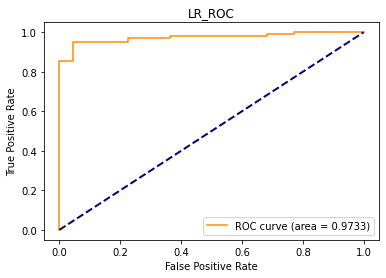

In [277]:
# 这段代码利用上段代码的预测信息，在测试集上测试logistic regression模型选择26个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_lr_outer.csv')
y_pred_df = pd.read_csv('y_pred_lr_outer.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_lr_outer.csv')
tpr_df = pd.read_csv('tpr_lr_outer.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR_ROC')
plt.legend(loc="lower right")
plt.savefig(r'lr_ROC_outer',dpi=600)
plt.show()

# 随机森林(RF)

In [23]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [24]:
param_grid_rf = {
                 'n_estimators':np.arange(100, 1000, 100),
                 'criterion':['gini', 'entropy'],
                }

In [216]:
# 在训练集上进行10折交叉验证，在验证集上验证AUC，保存训练集和验证集上的AUC
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i in range(1, len(x_train.columns)+1):
        rfc = RandomForestClassifier(random_state=j)
        GS = GridSearchCV(rfc, param_grid_rf, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = RandomForestClassifier(criterion=GS.best_params_['criterion'],
                                     n_estimators=GS.best_params_['n_estimators'],
                                     random_state=j)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        best_para_train.append({'criterion':GS.best_params_['criterion'],'n_estimators':GS.best_params_['n_estimators']})
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_rf_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_rf_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_rf_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_rf_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_rf_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_df_rf_train.csv', index=False)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


1


C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


0.9997395833333335
0.7465277777777778


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


2
1.0
0.9861111111111112


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


3


C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


1.0
1.0


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


4
1.0
1.0


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


5


C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


1.0
1.0


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


6


C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


1.0
0.9930555555555556


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


7
1.0
1.0


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


8


C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


1.0
1.0


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


9
1.0
1.0


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\dell\AppData\Local\Temp\ipykernel_9956\608877292.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


10
0.9999999999999999
1.0


In [25]:
# 从上面的结果可以看出,RF选择前17个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试RF模型选择17个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [10]:
        rfc = RandomForestClassifier(random_state=j)
        GS = GridSearchCV(rfc, param_grid_rf, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = RandomForestClassifier(criterion=GS.best_params_['criterion'],
                                     n_estimators=GS.best_params_['n_estimators'],
                                     random_state=j)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_rf.csv')
t1.to_csv('tpr_rf.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_rf.csv')
y_test_df.to_csv('y_test_rf.csv')  

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

10


C:\Users\dell\AppData\Local\Temp\ipykernel_15620\2024066032.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


0.7951388888888888


In [27]:
# 这段代码利用上段代码的预测信息，在测试集上测试RF模型选择17个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_rf.csv')
y_pred_df = pd.read_csv('y_pred_rf.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_rf.csv')
tpr_df = pd.read_csv('tpr_rf.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF_ROC')
plt.legend(loc="lower right")
plt.savefig(r'RF_ROC',dpi=600)
plt.show()

sensitivity: 1.0, specificity: 0.25
f1_score: 0.8571


In [29]:
x_test = pd.read_csv('test.txt',sep='\t')
x_test = x_test.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test = mean_norm(x_test)
y_test = pd.read_csv('test_label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [30]:
# 从上面的结果可以看出,RF选择前17个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试RF模型选择17个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [10]:
        rfc = RandomForestClassifier(random_state=j)
        GS = GridSearchCV(rfc, param_grid_rf, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = RandomForestClassifier(criterion=GS.best_params_['criterion'],
                                     n_estimators=GS.best_params_['n_estimators'],
                                     random_state=j)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_rf_outer.csv')
t1.to_csv('tpr_rf_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_rf_outer.csv')
y_test_df.to_csv('y_test_rf_outer.csv')  

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

10


C:\Users\dell\AppData\Local\Temp\ipykernel_15620\2994491991.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)


0.9626913265306122


sensitivity: 1.0, specificity: 0.8125
f1_score: 0.9703


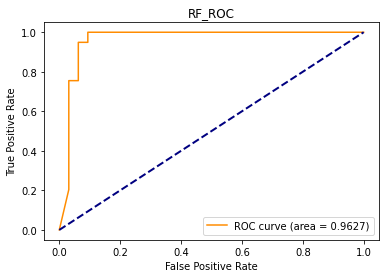

In [31]:
# 这段代码利用上段代码的预测信息，在测试集上测试RF模型选择17个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_rf_outer.csv')
y_pred_df = pd.read_csv('y_pred_rf_outer.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_rf_outer.csv')
tpr_df = pd.read_csv('tpr_rf_outer.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF_ROC')
plt.legend(loc="lower right")
plt.savefig(r'RF_ROC_outer',dpi=600)
plt.show()

# 支持向量机(SVM)

In [284]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('id')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [285]:
param_grid_svm = {
                  'kernel': ["linear", "poly", "rbf", "sigmoid"],
                  'degree': np.arange(1, 3, 1)}

In [286]:
# 在训练集上进行10折交叉验证，在验证集上验证AUC，保存训练集和验证集上的AUC
from sklearn.model_selection import StratifiedKFold #交叉验证
from sklearn.svm import SVC
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i in range(1, len(x_train.columns)+1):
        rfc = SVC(max_iter=-1, random_state=12345, probability=True)
        GS = GridSearchCV(rfc, param_grid_svm, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        best_para_train.append({'kernel':GS.best_params_['kernel'],'degree':GS.best_params_['degree']})
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_svm_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_svm_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_svm_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_svm_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_df_svm_train.csv', index=False)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

1
0.6372395833333333
0.763888888888889


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

2
0.9427083333333334
0.9861111111111112


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

3
0.9885416666666667
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

4
0.9911458333333334
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

5
0.9895833333333334
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

6
0.9979166666666667
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

7
0.9973958333333334
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

8
0.9973958333333334
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

9
0.9979166666666667
1.0
10
0.9979166666666666
1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

In [287]:
# 从上面的结果可以看出,SVM选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试SVM模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [5]:
        rfc = SVC(random_state=j)
        GS = GridSearchCV(rfc, param_grid_svm, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_svm.csv')
t1.to_csv('tpr_svm.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_svm.csv')
y_test_df.to_csv('y_test_svm.csv')  

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

2
0.9861111111111112


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

sensitivity: 0.9444, specificity: 1.0
f1_score: 0.9714


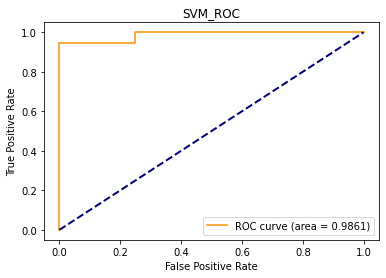

In [288]:
# 这段代码利用上段代码的预测信息，在测试集上测试SVM模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_svm.csv')
y_pred_df = pd.read_csv('y_pred_svm.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_svm.csv')
tpr_df = pd.read_csv('tpr_svm.csv')
fpr = fpr_df['5'].tolist()
tpr = tpr_df['5'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM_ROC')
plt.legend(loc="lower right")
plt.savefig(r'SVM_ROC',dpi=600)
plt.show()

In [289]:
x_test = pd.read_csv('test.txt',sep='\t')
x_test = x_test.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test = mean_norm(x_test)
y_test = pd.read_csv('test_label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [291]:
# 从上面的结果可以看出,SVM选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试SVM模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [5]:
        rfc = SVC(random_state=j)
        GS = GridSearchCV(rfc, param_grid_svm, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_svm_outer.csv')
t1.to_csv('tpr_svm_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_svm_outer.csv')
y_test_df.to_csv('y_test_svm_outer.csv')  

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

2
0.9950980392156863


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

sensitivity: 0.9608, specificity: 0.9545
f1_score: 0.9751


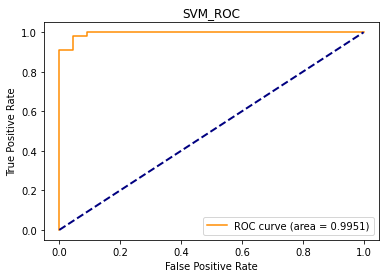

In [292]:
# 这段代码利用上段代码的预测信息，在测试集上测试SVM模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_svm_outer.csv')
y_pred_df = pd.read_csv('y_pred_svm_outer.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_svm_outer.csv')
tpr_df = pd.read_csv('tpr_svm_outer.csv')
fpr = fpr_df['5'].tolist()
tpr = tpr_df['5'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM_ROC')
plt.legend(loc="lower right")
plt.savefig(r'SVM_ROC_outer',dpi=600)
plt.show()

# 深度神经网络(DNN)

In [249]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [250]:
from sklearn.neural_network import MLPClassifier
param_grid_dnn = {
                  'solver': ["lbfgs", "Adam", "SGD"],
                  }

In [251]:
# 在训练集上进行10折交叉验证，在验证集上验证AUC，保存训练集和验证集上的AUC
from sklearn.model_selection import StratifiedKFold #交叉验证
from sklearn.svm import SVC
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i in range(1, len(x_train.columns)+1):
        rfc = MLPClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_dnn, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = MLPClassifier(solver=GS.best_params_['solver'],
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        best_para_train.append({'solver':GS.best_params_['solver']})
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_dnn_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_dnn_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_dnn_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_dnn_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_df_dnn_train.csv', index=False)

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_netw

1
0.88984375
0.8541666666666666


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_netw

2
0.9984375
0.9513888888888888


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

3
0.9989583333333333
0.9791666666666666


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

4
1.0
0.9375


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

5
1.0
0.9375
6
1.0
0.9340277777777778


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "D:\Anaconda3\lib\site-packag

7
1.0
0.9270833333333334
8


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

1.0
0.9340277777777778
9


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

1.0
0.9305555555555556
10


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
0.9340277777777778


In [252]:
# 从上面的结果可以看出,DNN选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试DNN模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [9]:
        rfc = MLPClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_dnn, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = MLPClassifier(solver=GS.best_params_['solver'],
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_dnn.csv')
t1.to_csv('tpr_dnn.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_dnn.csv')
y_test_df.to_csv('y_test_dnn.csv')  

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

3
0.9791666666666666


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


sensitivity: 0.9444, specificity: 0.625
f1_score: 0.8947


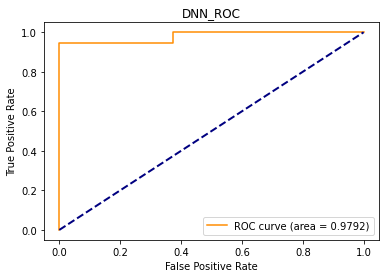

In [255]:
# 这段代码利用上段代码的预测信息，在测试集上测试DNN模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_dnn.csv')
y_pred_df = pd.read_csv('y_pred_dnn.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_dnn.csv')
tpr_df = pd.read_csv('tpr_dnn.csv')
fpr = fpr_df['9'].tolist()
tpr = tpr_df['9'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNN_ROC')
plt.legend(loc="lower right")
plt.savefig(r'DNN_ROC',dpi=600)
plt.show()

In [256]:
x_test = pd.read_csv('test.txt',sep='\t')
x_test = x_test.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test = mean_norm(x_test)
y_test = pd.read_csv('test_label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [258]:
# 从上面的结果可以看出,DNN选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试DNN模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [9]:
        rfc = MLPClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_dnn, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = MLPClassifier(solver=GS.best_params_['solver'],
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_dnn_outer.csv')
t1.to_csv('tpr_dnn_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_dnn_outer.csv')
y_test_df.to_csv('y_test_dnn_outer.csv')  

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

3
0.8830213903743316


In [259]:
# 这段代码利用上段代码的预测信息，在测试集上测试DNN模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_dnn_outer.csv')
y_pred_df = pd.read_csv('y_pred_dnn_outer.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_dnn_outer.csv')
tpr_df = pd.read_csv('tpr_dnn_outer.csv')
fpr = fpr_df['9'].tolist()
tpr = tpr_df['9'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNN_ROC')
plt.legend(loc="lower right")
plt.savefig(r'DNN_ROC_outer',dpi=600)
plt.show()

sensitivity: 0.9706, specificity: 0.1818
f1_score: 0.9041


# KNN

In [ ]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('id')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {
                  "n_neighbors": np.arange(1, 10, 1),
                  }

In [ ]:
# 在训练集上进行10折交叉验证，在验证集上验证AUC，保存训练集和验证集上的AUC
from sklearn.model_selection import StratifiedKFold #交叉验证
from sklearn.svm import SVC
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i in range(1, len(x_train.columns)+1):
        rfc = KNeighborsClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_knn, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = KNeighborsClassifier(n_neighbors=GS.best_params_["n_neighbors"],
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        best_para_train.append({"n_neighbors":GS.best_params_["n_neighbors"]})
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_knn_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_knn_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_knn_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_knn_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_df_knn_train.csv', index=False)

In [ ]:
# 从上面的结果可以看出,DNN选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试DNN模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [8]:
        rfc = KNeighborsClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_knn, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = KNeighborsClassifier(n_neighbors=GS.best_params_["n_neighbors"],
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_knn.csv')
t1.to_csv('tpr_knn.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_knn.csv')
y_test_df.to_csv('y_test_knn.csv')  

In [ ]:
# 这段代码利用上段代码的预测信息，在测试集上测试DNN模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_knn.csv')
y_pred_df = pd.read_csv('y_pred_knn.csv')
y_test = y_test_df['0'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_knn.csv')
tpr_df = pd.read_csv('tpr_knn.csv')
fpr = fpr_df['8'].tolist()
tpr = tpr_df['8'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN_ROC')
plt.legend(loc="lower right")
plt.savefig(r'KNN_ROC',dpi=600)
plt.show()

In [ ]:
test_X = pd.read_csv('test.txt',sep='\t')
test_X = test_X.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
test_X = mean_norm(test_X)
test_y = pd.read_csv('label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [ ]:
# 从上面的结果可以看出,DNN选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试DNN模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [8]:
        rfc = KNeighborsClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_knn, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = KNeighborsClassifier(n_neighbors=GS.best_params_["n_neighbors"],
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_knn_outer.csv')
t1.to_csv('tpr_knn_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_knn_outer.csv')
y_test_df.to_csv('y_test_knn_outer.csv')  

In [ ]:
# 这段代码利用上段代码的预测信息，在测试集上测试DNN模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_knn_outer.csv')
y_pred_df = pd.read_csv('y_pred_knn_outer.csv')
y_test = y_test_df['0'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_knn_outer.csv')
tpr_df = pd.read_csv('tpr_knn_outer.csv')
fpr = fpr_df['8'].tolist()
tpr = tpr_df['8'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN_ROC')
plt.legend(loc="lower right")
plt.savefig(r'KNN_ROC_outer',dpi=600)
plt.show()

# Adaboost

In [ ]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('ID')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada = {
                  "n_estimators": np.arange(100, 600, 100),
                  "learning_rate": np.arange(0, 1.1, 0.2)
                  }

In [ ]:
# 在训练集上进行10折交叉验证，在验证集上验证AUC，保存训练集和验证集上的AUC
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i in range(1, len(x_train.columns)+1):
        rfc = AdaBoostClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_ada, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = AdaBoostClassifier(n_estimators=GS.best_params_["n_estimators"],
                                 learning_rate=GS.best_params_["learning_rate"],
                                 random_state=12345
                            )
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        best_para_train.append({"n_estimators":GS.best_params_["n_estimators"]},{"learning_rate":GS.best_params_["learning_rate"]})
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_ada_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_ada_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_ada_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_ada_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_df_ada_train.csv', index=False)

In [ ]:
# 从上面的结果可以看出,DNN选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试DNN模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [10]:
        rfc = AdaBoostClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_ada, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = AdaBoostClassifier(n_estimators=GS.best_params_["n_estimators"],
                                 learning_rate=GS.best_params_["learning_rate"],
                                 random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_ada.csv')
t1.to_csv('tpr_ada.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_ada.csv')
y_test_df.to_csv('y_test_ada.csv')  

In [ ]:
# 这段代码利用上段代码的预测信息，在测试集上测试DNN模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_ada.csv')
y_pred_df = pd.read_csv('y_pred_ada.csv')
y_test = y_test_df['0'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_ada.csv')
tpr_df = pd.read_csv('tpr_ada.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost_ROC')
plt.legend(loc="lower right")
plt.savefig(r'ada_ROC',dpi=600)
plt.show()

In [ ]:
test_X = pd.read_csv('exp.txt',sep='\t')
test_X = test_X.set_index('id')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
test_X = mean_norm(test_X)
test_y = pd.read_csv('label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [ ]:
# 从上面的结果可以看出,DNN选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试DNN模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [10]:
        rfc = AdaBoostClassifier(random_state=12345)
        GS = GridSearchCV(rfc, param_grid_ada, cv=10)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = AdaBoostClassifier(n_estimators=GS.best_params_["n_estimators"],
                                 learning_rate=GS.best_params_["learning_rate"],
                                 random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_ada_outer.csv')
t1.to_csv('tpr_ada_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_ada_outer.csv')
y_test_df.to_csv('y_test_ada_outer.csv')  

In [ ]:
# 这段代码利用上段代码的预测信息，在测试集上测试DNN模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_ada_outer.csv')
y_pred_df = pd.read_csv('y_pred_ada_outer.csv')
y_test = y_test_df['0'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_ada_outer.csv')
tpr_df = pd.read_csv('tpr_ada_outer.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost_ROC')
plt.legend(loc="lower right")
plt.savefig(r'ada_ROC_outer',dpi=600)
plt.show()

# 分别绘制训练集和验证集选择不同数量Top特征得到的AUC对应的折线图

In [32]:
rf_df = pd.read_csv('auc_rf_test.csv')
rf_test = rf_df.iloc[0,:]
lr_df = pd.read_csv('auc_lr_test.csv')
lr_test = lr_df.iloc[0,:]
svm_df = pd.read_csv('auc_svm_test.csv')
svm_test = svm_df.iloc[0,:]
dnn_df = pd.read_csv('auc_dnn_test.csv')
dnn_test = dnn_df.iloc[0,:]
ada_df = pd.read_csv('auc_ada_test.csv')
ada_test = ada_df.iloc[0,:]

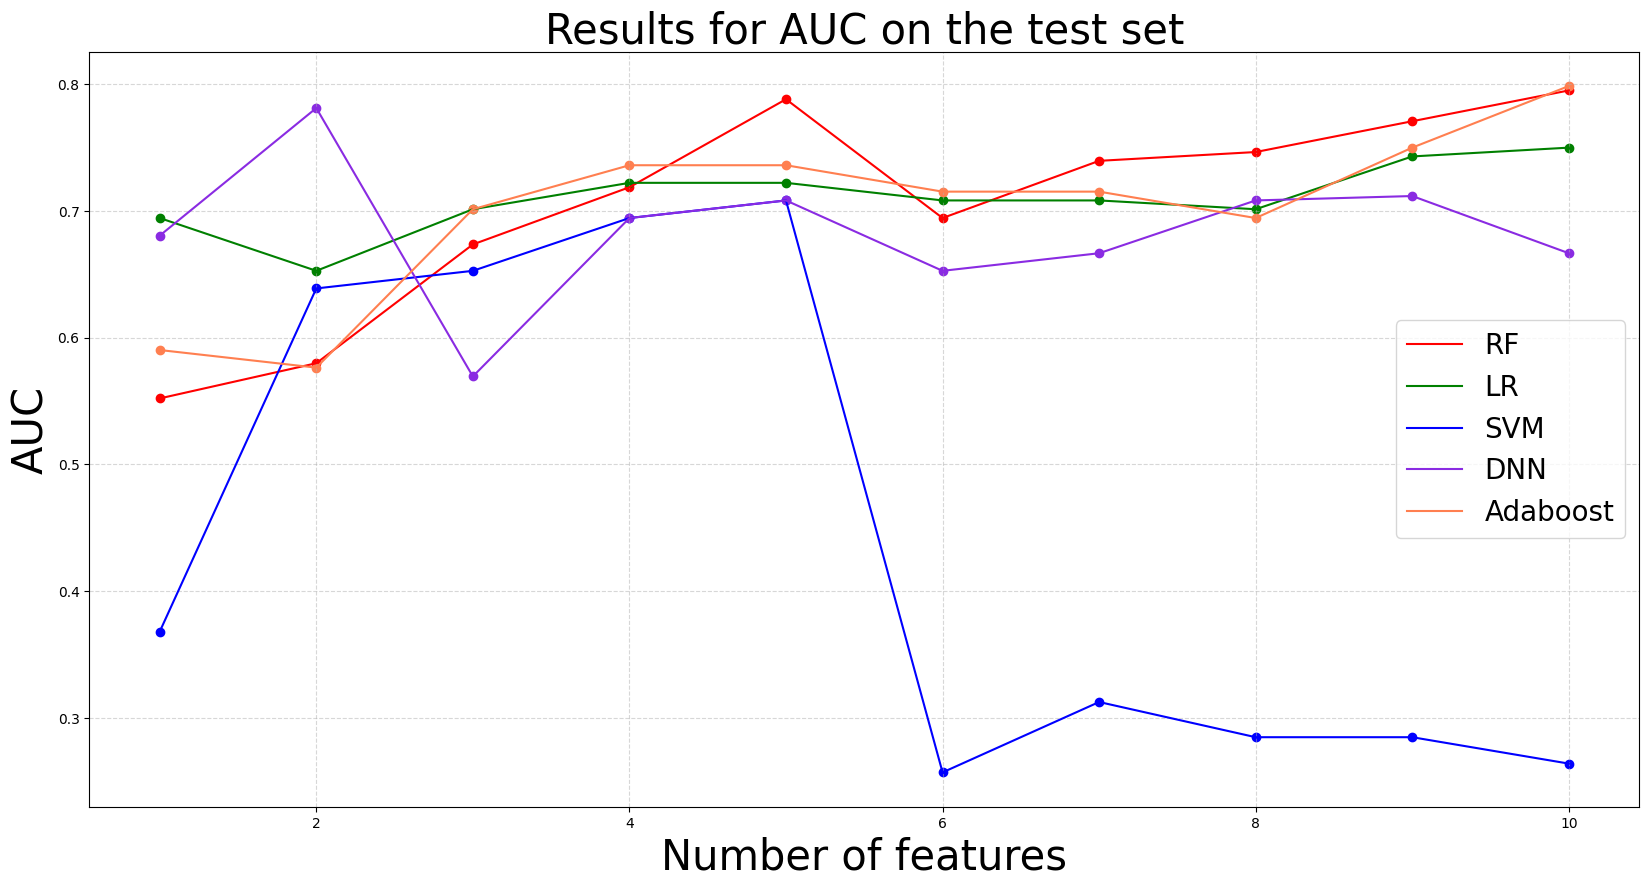

In [33]:
plt.figure(figsize=(20, 10), dpi=100)
genes_num = [i for i in range(1,11)]
plt.plot(genes_num, rf_test, c='red', label="RF")
plt.plot(genes_num, lr_test, c='green', label="LR")
plt.plot(genes_num, svm_test, c='blue', label="SVM")
plt.plot(genes_num, dnn_test, c='blueviolet', label="DNN")
plt.plot(genes_num, ada_test, c='coral', label="Adaboost")
plt.scatter(genes_num, rf_test, c='red')
plt.scatter(genes_num, lr_test, c='green')
plt.scatter(genes_num, svm_test, c='blue')
plt.scatter(genes_num, dnn_test, c='blueviolet')
plt.scatter(genes_num, ada_test, c='coral')
plt.legend(loc='best', prop={'size': 20})
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Number of features", fontdict={'size': 30})
plt.ylabel("AUC", fontdict={'size': 30})
plt.title("Results for AUC on the test set", fontdict={'size': 30})
plt.savefig(r'测试集AUC.jpg',dpi=600)
plt.show()

In [34]:
rf_df = pd.read_csv('acc_rf_test.csv')
rf_test = rf_df.iloc[0,:]
lr_df = pd.read_csv('acc_lr_test.csv')
lr_test = lr_df.iloc[0,:]
svm_df = pd.read_csv('acc_svm_test.csv')
svm_test = svm_df.iloc[0,:]
dnn_df = pd.read_csv('acc_dnn_test.csv')
dnn_test = dnn_df.iloc[0,:]
ada_df = pd.read_csv('acc_ada_test.csv')
ada_test = ada_df.iloc[0,:]

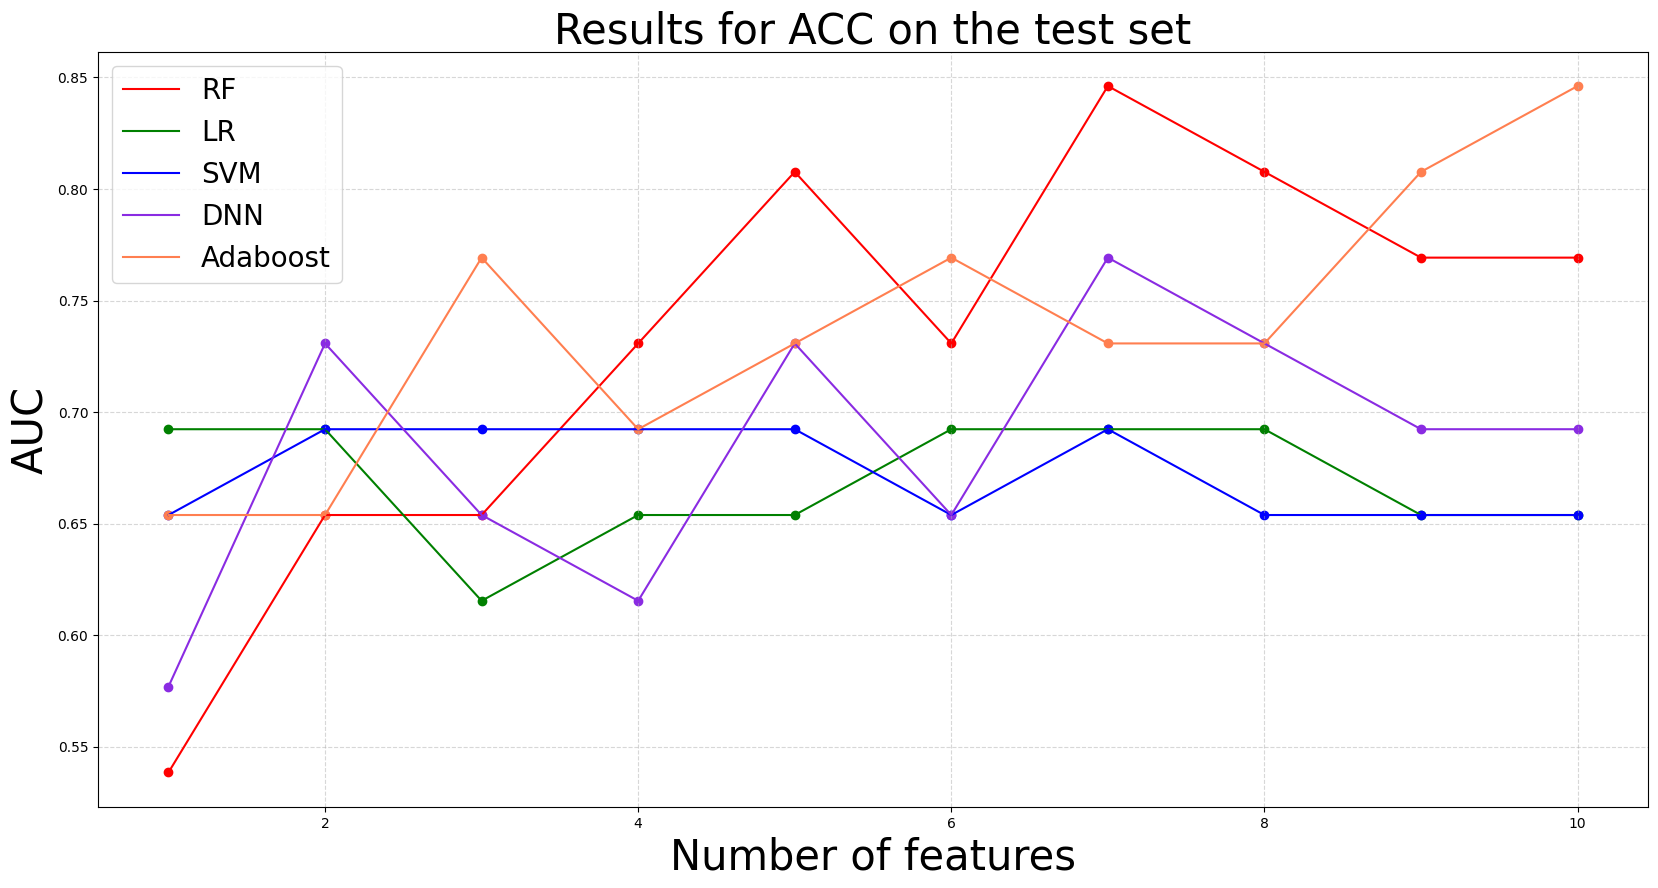

In [35]:
plt.figure(figsize=(20, 10), dpi=100)
genes_num = [i for i in range(1,11)]
plt.plot(genes_num, rf_test, c='red', label="RF")
plt.plot(genes_num, lr_test, c='green', label="LR")
plt.plot(genes_num, svm_test, c='blue', label="SVM")
plt.plot(genes_num, dnn_test, c='blueviolet', label="DNN")
plt.plot(genes_num, ada_test, c='coral', label="Adaboost")
plt.scatter(genes_num, rf_test, c='red')
plt.scatter(genes_num, lr_test, c='green')
plt.scatter(genes_num, svm_test, c='blue')
plt.scatter(genes_num, dnn_test, c='blueviolet')
plt.scatter(genes_num, ada_test, c='coral')
plt.legend(loc='best', prop={'size': 20})
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Number of features", fontdict={'size': 30})
plt.ylabel("AUC", fontdict={'size': 30})
plt.title("Results for ACC on the test set", fontdict={'size': 30})
plt.savefig(r'测试集ACC.jpg',dpi=600)
plt.show()

# 箱线图绘制

In [55]:
# 内部验证集格式整理
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('ID')
# def mean_norm(df_input):
#     return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
# data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]
x_test.to_csv('x_test_inner.csv')
y_test.to_csv('y_test_inner.csv',index=False)

In [56]:
inner = pd.read_csv('inner.csv')
for i in range(2,12):
    x = inner.iloc[:,[0,1,i]]
    x.columns = ['id', 'Type', 'Expression']
    x.to_csv(f'../箱线图/input_{inner.columns[i]}.txt',sep='\t',index=False)

In [53]:
# 外部验证集格式整理
outer = pd.read_csv('outer.csv')
for i in range(2,12):
    x = outer.iloc[:,[0,1,i]]
    x.columns = ['id', 'Type', 'Expression']
    x.to_csv(f'../箱线图/input_{outer.columns[i]}.txt',sep='\t',index=False)